In [1]:
import numpy as np
from matplotlib import pyplot as plt
import skimage

def cart2pol(x, y, x0=0, y0=0):
    rho = np.sqrt((x-x0)**2 + (y-y0)**2)
    phi = np.arctan2((y-y0), (x-x0))
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

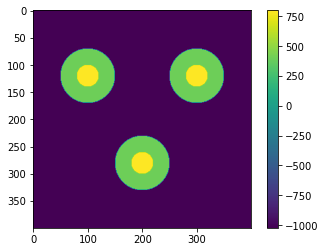

In [2]:
voxelsize_mm_scalar = .1
voxelsize_mm = [voxelsize_mm_scalar] * 3

# patch_size_px = [200, 200]
patch_size_mm = [40, 40]
background_density_hu=-1024



patch_thickness_mm = 1.0
# patch_background_density_hu = 

# patch = np.zeros(patch_size_px)


# center1 = (100, 256)
# radius1 = 20
def add_circle(img, center1, radius1, intensity=1):
    x, y = np.indices(img.shape)
    mask = ((x - center1[0])**2 + (y - center1[1])**2 < radius1**2).astype(bool)
    img[mask==True] = intensity
    return img

def add_circle_mm(img, voxelsize_mm_scalar, center_mm, radius_mm, intensity_hu):
    return add_circle(img, np.asarray(center_mm) / voxelsize_mm_scalar, radius_mm / voxelsize_mm_scalar, intensity_hu)


def make_patch(voxelsize_mm_scalar = .1, patch_size_mm = [40, 40], patch_object_density_hu = 400, patch_object_center_density_hu = 800, background_density_hu=-1024):
    voxelsize_mm = [voxelsize_mm_scalar] * 3
    patch_size_px = (np.asarray(patch_size_mm) / voxelsize_mm_scalar).astype(int)
    
    patch = np.ones(patch_size_px) * background_density_hu
    patch = add_circle_mm(patch, voxelsize_mm_scalar, (12.0, 10.0), 5.0, patch_object_density_hu)
    patch = add_circle_mm(patch, voxelsize_mm_scalar, (12.0, 10.0), 2.0, patch_object_center_density_hu)
    patch = add_circle_mm(patch, voxelsize_mm_scalar, (12.0, 30.0), 5.0, patch_object_density_hu)
    patch = add_circle_mm(patch, voxelsize_mm_scalar, (12.0, 30.0), 2.0, patch_object_center_density_hu)
    patch = add_circle_mm(patch, voxelsize_mm_scalar, (28.0, 20.0), 5.0, patch_object_density_hu)
    patch = add_circle_mm(patch, voxelsize_mm_scalar, (28.0, 20.0), 2.0, patch_object_center_density_hu)
    return patch

patch = make_patch(voxelsize_mm_scalar, patch_size_mm)

plt.imshow(patch)
plt.colorbar()

In [3]:
# voxelsize_mm = [.5, .5, .5]
patch_3ď_shape = [patch.shape[0], patch.shape[0], patch.shape[1]]
colon_radius_mm = 10

# colon_radius

# patch_
patch3d = np.ones(patch_3ď_shape) * background_density_hu
# for phi in range(0, patch.shape[0]):
#     x, y = pol2cart(patch_radius, phi)
#     patch3d[int(x), int(y), :] = patch[phi,:]
    
patch3d.max()

-1024.0

In [4]:
# for i in range(patch.shape[0]):
#     patch[i, :] = i

0.0 28.284271247461902
0.0049999583339581655 6.283185307179586


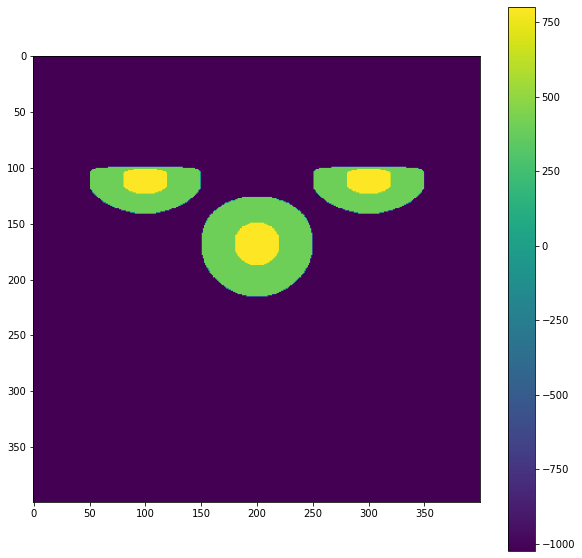

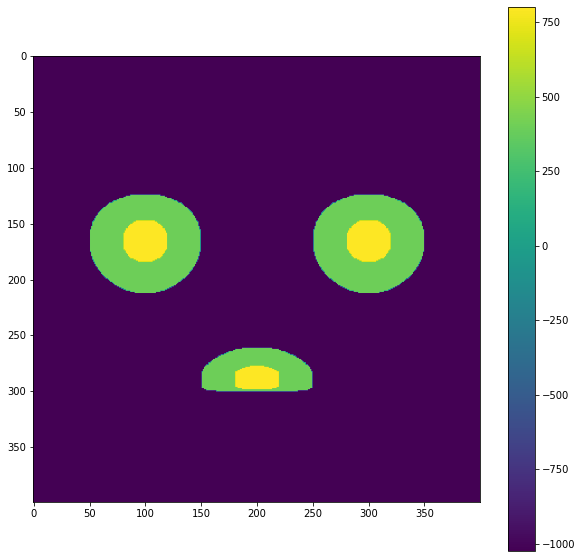

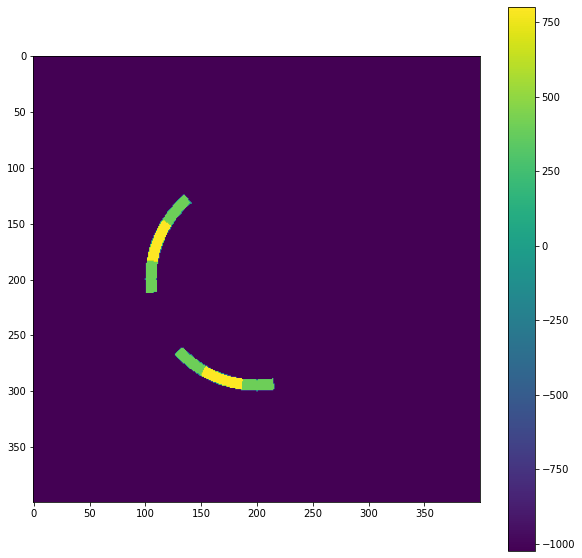

In [5]:
rhos = []
phis = []
def place_patch_on_tube(patch, patch_thickness_mm, tube_radius_mm, voxelsize_mm_scalar, patch3d=None, background_density_hu=-1024):
    
    voxelsize_mm = [voxelsize_mm_scalar] * 3
    patch_pixelsize_mm = voxelsize_mm[:2]
    color_radius = tube_radius_mm
    
    if not patch3d:
        patch_3ď_shape = [patch.shape[0], patch.shape[0], patch.shape[1]]
        patch3d = np.ones(patch_3ď_shape) * background_density_hu
        
    for x in range(0, patch3d.shape[0]):
        for y in range(0, patch3d.shape[1]):

            rho, phi = cart2pol(x * voxelsize_mm[0], y * voxelsize_mm[1], patch.shape[0] * voxelsize_mm[0] / 2, patch.shape[1] * voxelsize_mm[1] / 2)
            phi = phi + np.pi

            rhos.append(rho)
            phis.append(phi)

            if (rho > (colon_radius_mm - patch_thickness_mm)) and (rho <= colon_radius_mm):
                # patch3d[x,y,:] = 1

                patch_row_px = int(colon_radius_mm * phi / patch_pixelsize_mm[0])
                if (patch_row_px >= 0 and patch_row_px < patch.shape[0]):
                    patch3d[x, y,:] = patch[patch_row_px, :]

    return patch3d    
            
#             # phi*colon_radius_mm
#             # 3
#             
#             # print(patch_row_px, end="")
#             if (patch_row_px >= 0 and patch_row_px < patch_size_mm[1]):
#                 # patch3d[x, y,:] = patch[int(phi/(2*np.pi) * patch.shape[1]),:]
                
#                 patch3d[x, y,:] = patch[patch_row_px,:]
#                 # print(" ok")
#             else:
#                 # print("")
#                 pass

patch3d = place_patch_on_tube(patch, patch_thickness_mm, colon_radius_mm, voxelsize_mm_scalar)
print(np.min(rhos), np.max(rhos))
print(np.min(phis), np.max(phis))
plt.figure(figsize=(10,10))
plt.imshow(np.max(patch3d, axis=0))
plt.colorbar()
plt.figure(figsize=(10,10))
plt.imshow(np.max(patch3d, axis=1))
plt.colorbar()
plt.figure(figsize=(10,10))
plt.imshow(np.max(patch3d, axis=2))
plt.colorbar()

In [12]:
!pip install io3d pydicom imma SimpleITK

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 48.4 MB 6.9 MB/s eta 0:00:01


In [14]:
import io3d
# io3d.write(().astype(int),)
io3d.write(data3d=(patch3d).astype("int16"),
           # path="~/data/temp2/image_{:04d}.dcm", 
           path="image.mhd",
           metadata={"voxelsize_mm": voxelsize_mm})

In [15]:
# !pip install ndnoise

In [16]:
# import ndnoise
import scipy
from loguru import logger
import datetime

In [17]:
def noises(shape, sample_spacing=None, exponent=0, lambda0=0, lambda1=1, method="space", **kwargs):
    """ Create noise based on space paramters.

    :param shape:
    :param sample_spacing: in space units like milimeters
    :param exponent:
    :param lambda0: wavelength of first noise
    :param lambda1: wavelength of last noise
    :param method: use "space" or "freq" method. "freq" is more precise but slower.
    :param kwargs:
    :return:
    """
    kwargs1 = dict(
        shape=shape,
        sample_spacing=sample_spacing,
        exponent=exponent,
        lambda0=lambda0,
        lambda1=lambda1,
        **kwargs
    )

    if method is "space":
        noise = noises_space(**kwargs1)
    elif method is "freq":
        noise = noises_freq(**kwargs1)
    else:
        logger.error("Unknown noise method `{}`".format(method))

    return noise

def ndimage_normalization(data, std_factor=1.0):
    t0 = datetime.datetime.now()
    data0n = (data - np.mean(data)) * 1.0 / (std_factor * np.var(data)**0.5)
    logger.debug(f"t_norm={datetime.datetime.now() - t0}")
    
    return data0n

def gaussian_filter_fft(image, sigma):
    input_ = np.fft.fftn(image)
    result = scipy.ndimage.fourier_gaussian(input_, sigma=sigma)
    result = np.fft.ifftn(result)
    return np.abs(result)

def noises_space(
        shape,
        sample_spacing=None,
        exponent=0.0,
        lambda0=0,
        lambda1=1,
        random_generator_seed=None,
        use_fft="auto",
        **kwargs
):
    """
    use_fft: ("auto", "lambda0", "lambda1", "both", "none") auto: use fft if lambda is > 5
    """

    data0 = 0
    data1 = 0
    w0 = 0
    w1 = 0
    lambda0_px = None
    lambda1_px = None
    if random_generator_seed is not None:
        np.random.seed(seed=random_generator_seed)
        
    use_fft_l0 = use_fft == "lambda0" or use_fft == "both"
    use_fft_l1 = use_fft == "lambda1" or use_fft == "both"
    if use_fft == "auto":
        use_fft_l0 = lambda0 > 5
        use_fft_l1 = lambda1 > 5

    # lambda1 = lambda_stop * np.asarray(sample_spacing)
    t0 = datetime.datetime.now()

    if lambda0 is not None:
        lambda0_px = lambda0 / np.asarray(sample_spacing)
        data0 = np.random.rand(*shape)
        if use_fft_l0:
            data0 = gaussian_filter_fft(data0, sigma=lambda1_px)
            pass
        else:
            data0 = scipy.ndimage.filters.gaussian_filter(data0, sigma=lambda0_px)
        data0 = ndimage_normalization(data0)
        w0 = np.exp(exponent * lambda0)
    logger.debug(f"t_l0={datetime.datetime.now() - t0}")
    t0 = datetime.datetime.now()
    if lambda1 is not None:
        lambda1_px = lambda1 / np.asarray(sample_spacing)
        data1 = np.random.rand(*shape)
        if use_fft_l1:
            data1 = gaussian_filter_fft(data1, sigma=lambda1_px)
        else:
            data1 = scipy.ndimage.filters.gaussian_filter(data1, sigma=lambda1_px)

        data1 = ndimage_normalization(data1)
        w1 = np.exp(exponent * lambda1)
    logger.debug(f"t_l1={datetime.datetime.now() - t0}")
    t0 = datetime.datetime.now()
    logger.debug("lambda_px {} {}".format(lambda0_px, lambda1_px))
    logger.debug(f"use_fft lambda 0 and 1 {use_fft_l0} {use_fft_l1}")
    wsum = w0 + w1
    if wsum > 0:
        w0 = w0 / wsum
        w1 = w1 / wsum

    # print w0, w1
    # print np.mean(data0), np.var(data0)
    # print np.mean(data1), np.var(data1)

    data = ( data0 * w0 +  data1 * w1)
    logger.debug("w0, w1 {} {}".format(w0, w1))

    # plt.figure()
    # plt.imshow(data0[:,:,50], cmap="gray")
    # plt.colorbar()
    # plt.figure()
    # plt.imshow(data1[:,:,50], cmap="gray")
    # plt.colorbar()
    return data

<>:22: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:22: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/tmp/pbs.12582475.meta-pbs.metacentrum.cz/ipykernel_3523266/2278645259.py:22: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if method is "space":
/var/tmp/pbs.12582475.meta-pbs.metacentrum.cz/ipykernel_3523266/2278645259.py:24: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif method is "freq":


2022-08-27 17:02:48.399 | DEBUG    | __main__:ndimage_normalization:34 - t_norm=0:00:00.320511
2022-08-27 17:02:48.403 | DEBUG    | __main__:noises_space:86 - t_l0=0:00:01.614424
2022-08-27 17:02:58.603 | DEBUG    | __main__:ndimage_normalization:34 - t_norm=0:00:00.315857
2022-08-27 17:02:58.605 | DEBUG    | __main__:noises_space:98 - t_l1=0:00:10.201819
2022-08-27 17:02:58.608 | DEBUG    | __main__:noises_space:100 - lambda_px [1. 1. 1.] [16. 16. 16.]
2022-08-27 17:02:58.609 | DEBUG    | __main__:noises_space:101 - use_fft lambda 0 and 1 False True
2022-08-27 17:02:58.907 | DEBUG    | __main__:noises_space:112 - w0, w1 0.5 0.5


<Figure size 432x288 with 0 Axes>

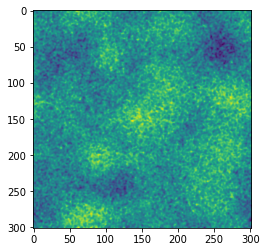

<Figure size 432x288 with 0 Axes>

In [18]:
noise = noises(
        [301, 302, 303],
        sample_spacing=[1,1,1],
        random_generator_seed=5,
        lambda0=1,
        lambda1=16,
        exponent=0,
        method="space"
    )
plt.imshow(noise[:,:,100])

plt.figure()
# ndnoise.filtration.spectrum_analysis_3d(noise)

2022-08-27 17:02:59.108 | DEBUG    | __main__:ndimage_normalization:34 - t_norm=0:00:00.000768
2022-08-27 17:02:59.109 | DEBUG    | __main__:noises_space:86 - t_l0=0:00:00.004370
2022-08-27 17:02:59.135 | DEBUG    | __main__:ndimage_normalization:34 - t_norm=0:00:00.000830
2022-08-27 17:02:59.136 | DEBUG    | __main__:noises_space:98 - t_l1=0:00:00.026295
2022-08-27 17:02:59.137 | DEBUG    | __main__:noises_space:100 - lambda_px [1. 1.] [16. 16.]
2022-08-27 17:02:59.138 | DEBUG    | __main__:noises_space:101 - use_fft lambda 0 and 1 False True
2022-08-27 17:02:59.139 | DEBUG    | __main__:noises_space:112 - w0, w1 0.5 0.5


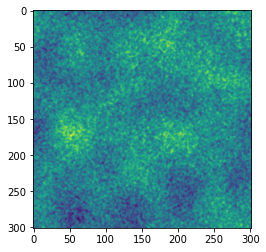

In [19]:
noise2d = noises(
        [301, 302],
        sample_spacing=[1,1],
        random_generator_seed=5,
        lambda0=1,
        lambda1=16,
        exponent=0,
        method="space"
    )
plt.imshow(noise2d[:,:])

2022-08-27 17:03:11.859 | DEBUG    | __main__:ndimage_normalization:34 - t_norm=0:00:00.731584
2022-08-27 17:03:11.861 | DEBUG    | __main__:noises_space:86 - t_l0=0:00:03.282192
2022-08-27 17:03:22.305 | DEBUG    | __main__:ndimage_normalization:34 - t_norm=0:00:00.730549
2022-08-27 17:03:22.309 | DEBUG    | __main__:noises_space:98 - t_l1=0:00:10.447173
2022-08-27 17:03:22.311 | DEBUG    | __main__:noises_space:100 - lambda_px [1. 1. 1.] [100. 100. 100.]
2022-08-27 17:03:22.312 | DEBUG    | __main__:noises_space:101 - use_fft lambda 0 and 1 False True
2022-08-27 17:03:23.135 | DEBUG    | __main__:noises_space:112 - w0, w1 0.9999996445923355 3.554076645744104e-07


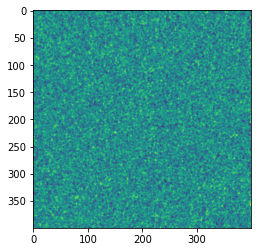

In [20]:
# noise = np.random.normal(scale=100, size=patch3d.shape)

noise = noises(
        patch3d.shape,
        sample_spacing=voxelsize_mm,
        random_generator_seed=5,
        lambda0=0.1,
        lambda1=10,
        exponent=-1.5,
        method="space",
        # method="freq"
    )


plt.imshow(noise[10,:,:])

In [21]:
patch3d.dtype

dtype('float64')

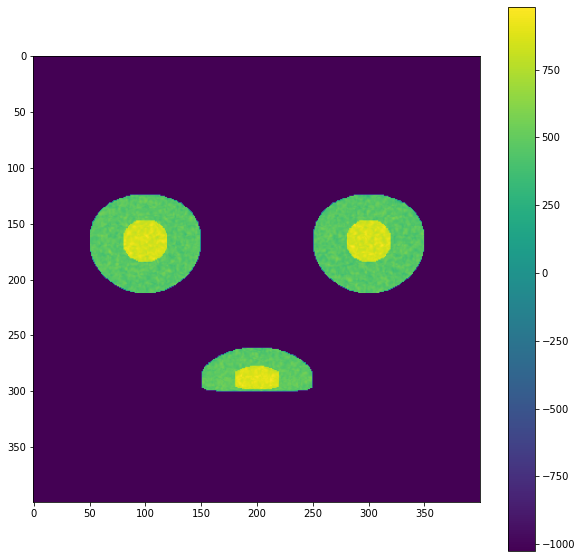

In [22]:
patch3d_noise = patch3d 
patch3d_noise[patch3d > background_density_hu] += (noise[patch3d > background_density_hu] * 50)
patch3d_noise[patch3d_noise < background_density_hu] = background_density_hu
# patch3d_noise = 

plt.figure(figsize=(10,10))
plt.imshow(np.max(patch3d_noise, axis=1))
plt.colorbar()

In [23]:
def random_direction_vector(return_angles=False):
    """
    Get random direction vector
    :param return_angles: gives also the angles
    :return:
        vector
        or
        vector, theta, phi
    """
    xi1 = np.random.rand()
    xi2 = np.random.rand()

    # theta = np.arccos(np.sqrt(1.0-xi1))
    theta = np.arccos(1.0 - (xi1 * 1))
    phi = xi2 * 2 * np.pi

    xs = np.sin(theta) * np.cos(phi)
    ys = np.sin(theta) * np.sin(phi)
    zs = np.cos(theta)

    vector = np.asarray([xs, ys, zs])
    if return_angles:
        return vector, theta, phi
    return vector


In [24]:
def random_rotate_volume(data3d, background_density_hu=-1024):
    vec, theta, phi = random_direction_vector(return_angles=True)
    alpha = np.random.random() * 360
    theta = theta * 360 / (2 * np.pi)
    phi = phi * 360 / (2 * np.pi)
    
    data3d = scipy.ndimage.rotate(data3d, alpha, axes=(1, 0), reshape=False, order=0, mode='constant', cval=background_density_hu, prefilter=True)
    data3d = scipy.ndimage.rotate(data3d, theta, axes=(1, 2), reshape=False, order=0, mode='constant', cval=background_density_hu, prefilter=True)
    data3d = scipy.ndimage.rotate(data3d, phi, axes=(0, 2), reshape=False, order=0, mode='constant', cval=background_density_hu, prefilter=True)
    
    return data3d
    

In [25]:
random_direction_vector(return_angles=True)

(array([0.36101227, 0.9325424 , 0.00590016]),
 1.5648961364157548,
 1.201436452564032)

# Prepare augmented patch

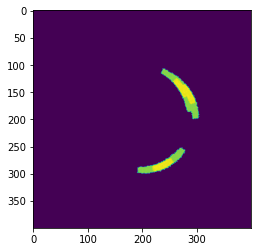

In [26]:
patch = make_patch(patch_object_center_density_hu=2000, patch_object_density_hu=1500)
angle = np.random.random() * 360

patch = skimage.transform.rotate(patch, angle, order=0,  preserve_range=True, cval=background_density_hu)
plt.imshow(patch)
patch3d = place_patch_on_tube(patch, patch_thickness_mm, colon_radius_mm, voxelsize_mm_scalar)


patch3d[patch3d > background_density_hu] += (noise[patch3d > background_density_hu] * 50)
# patch3d_noise = patch3d 
# patch3d[patch3d > 0] += (noise * 50)[patch3d > 0]
# patch3d_noise[patch3d_noise < 0] = 0

patch3d = random_rotate_volume(patch3d)

plt.imshow(np.max(patch3d, axis=1))

In [36]:
import io3d
# datap = io3d.read("/home/appuser/data/biomedical/orig/pilsen_pigs_raw/transplantation/Tx033D_Art/")
datap = io3d.read("/storage/plzen4-ntis/projects/korpusy_cv/mjirik_pilsen_pigs/Tx018D_Ven.mhd")
datap.data3d.shape

(882, 512, 512)

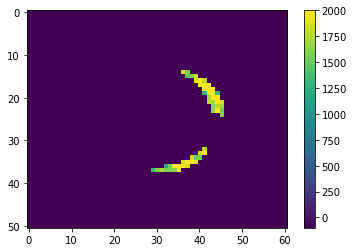

In [37]:
import imma
patch3dr = imma.image.resize_to_mm(patch3d, voxelsize_mm, datap.voxelsize_mm,order=2, preserve_range=True)
patch3dr.shape
plt.imshow(np.max(patch3dr, axis=1), clim=[-100,2000])
plt.colorbar()

In [38]:
indst = (np.random.rand(3)  * (np.asarray(datap.data3d.shape) - patch3dr.shape - 1)).astype(int)
indsp = indst + patch3dr.shape
slices = [slice(indst[0], indsp[0]), slice(indst[2], indsp[2]), slice(indst[2], indsp[2])]

# data3d[]
slices

[slice(799, 850, None), slice(283, 344, None), slice(283, 344, None)]

In [39]:

datap.data3d[slices] = np.maximum(datap.data3d[slices], patch3dr)

# datap.data3d[:indst[0],:,:] = 1000
# datap.data3d[:,:indst[1],:] = 1000
# datap.data3d[:,:,:indst[2]] = 1000
indst

/var/tmp/pbs.12582475.meta-pbs.metacentrum.cz/ipykernel_3523266/1170993847.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  datap.data3d[slices] = np.maximum(datap.data3d[slices], patch3dr)


array([799, 251, 283])

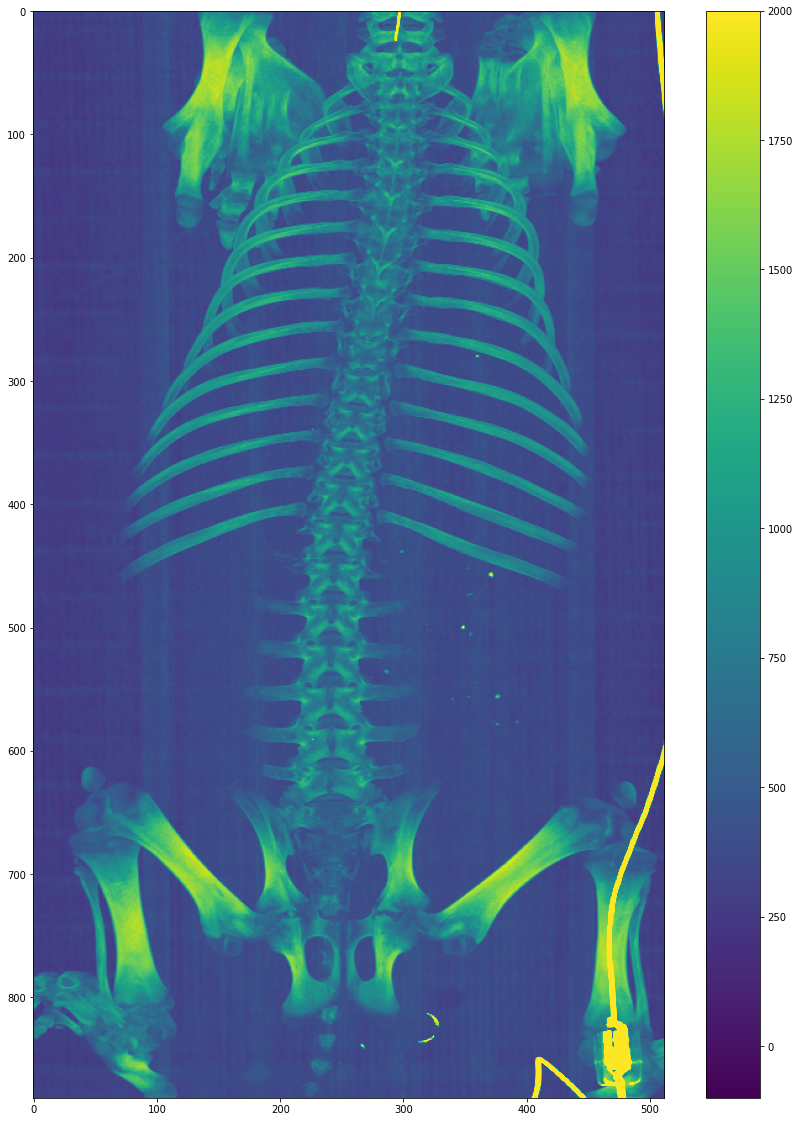

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,20))
plt.imshow(np.max(datap.data3d, axis=1), clim=[-100,2000])
plt.colorbar()

In [151]:
pts = np.asarray(np.nonzero(patch3d > background_density_hu))
mx = np.max(pts, axis=1)
mn = np.min(pts, axis=1)
margin = int(np.mean(mx) * 0.05)
margin

12

In [157]:
patch3d.shape

(400, 400, 400)

In [156]:
mx

array([265, 226, 288])

In [153]:
patch3dm = (np.ones(mx + 2*margin) * background_density_hu).astype(np.int16)

In [158]:
patch3dm[margin:mx[0]+margin, margin:mx[1]+margin, margin:mx[2]+margin] = patch3d[mn[0]:mx[0], mn[1]:mx[1], mn[2]: mx[2]]

ValueError: could not broadcast input array from shape (263,165,198) into shape (265,226,288)

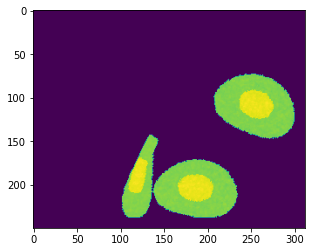

In [155]:
plt.imshow(np.max(patch3dm, axis=0))